In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Load the Dataset

In [2]:
df=pd.read_csv('netflix.csv')

# Describe and Explore data

In [3]:
df.head(2)#Explore few records

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [4]:
df.info()#column level statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Insights:-  
    1.There are total 11 features in dataset  
    2.Some columns have nan/null values

In [5]:
df.describe(include='all') #descriptive statistics

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [6]:
df['show_id'].nunique()  #All show_Id are unique and non missing values

8807

In [7]:
df['type'].unique() # There are 2 types of content -  Movies and TV Shows

array(['Movie', 'TV Show'], dtype=object)

In [8]:
df['title'].nunique() # All title values are present,no missing title

8807

In [9]:
df['type'].nunique()

2

In [10]:
len(df[df['director'].isnull()]),len(df[df['director'].isnull()])/len(df)*100 # 2634 director names are missing, around 30%

(2634, 29.908027705234474)

In [11]:
len(df[df['cast'].isnull()]),len(df[df['cast'].isnull()]) /len(df)*100 #825 cast names are missing

(825, 9.367548540933349)

In [12]:
len(df[df['country'].isna()]),len(df[df['country'].isna()])/len(df)*100 #831 country names are missing

(831, 9.435676166685592)

**Function to check any missing/nan/null values in whole dataframe**

In [13]:
#function to check missing/NA/NULL values from DF
for i in range(df.shape[1]):
    if df.isna().sum()[i]>0:
        print("Missing values in feature",df.isna().sum().index[i],':',df.isna().sum()[i])

Missing values in feature director : 2634
Missing values in feature cast : 825
Missing values in feature country : 831
Missing values in feature date_added : 10
Missing values in feature rating : 4
Missing values in feature duration : 3


**Start imputing missing values from lowest to highest**
1. Duration value is misplaced into rating column, hence copy from rating to duration

In [14]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [15]:
# Copy values from rating column to duration column
lst_index=list(df[df['duration'].isna()].index)
df.loc[lst_index, 'duration'] = df.loc[lst_index, 'rating']
df.loc[lst_index,'rating'] = np.nan
df.loc[lst_index,:]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


In [16]:
#function to check missing/NA/NULL values from DF
for i in range(df.shape[1]):
    if df.isna().sum()[i]>0:
        print("Missing values in feature",df.isna().sum().index[i],':',df.isna().sum()[i])

Missing values in feature director : 2634
Missing values in feature cast : 825
Missing values in feature country : 831
Missing values in feature date_added : 10
Missing values in feature rating : 7


2. Check Distributuin of rating over all movies and shows, Majority of conetnt is for matured audience  
  By looking at description column, it is fair to give TV-MA rating for all missing rating column  
  also 32% movies/shows has TV-MA rating hence it is appropriate to assign same to these.

In [17]:
df['rating'].value_counts()/100

TV-MA       32.07
TV-14       21.60
TV-PG        8.63
R            7.99
PG-13        4.90
TV-Y7        3.34
TV-Y         3.07
PG           2.87
TV-G         2.20
NR           0.80
G            0.41
TV-Y7-FV     0.06
NC-17        0.03
UR           0.03
Name: rating, dtype: float64

In [18]:
df['rating'].fillna('TV-MA',inplace=True)

In [19]:
#function to check missing/NA/NULL values from DF
for i in range(df.shape[1]):
    if df.isna().sum()[i]>0:
        print("Missing values in feature",df.isna().sum().index[i],':',df.isna().sum()[i])

Missing values in feature director : 2634
Missing values in feature cast : 825
Missing values in feature country : 831
Missing values in feature date_added : 10


3. Since date_added column values are random w.r.t release year, we can take any date in release year for e.g. 1st Jan

In [20]:
lst_index=list(df[df['date_added'].isna()].index)
df.loc[lst_index, 'date_added'] = ['January 1, ' + str(i) for i in df.loc[lst_index,'release_year']]
df.loc[lst_index,:]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,"January 1, 2013",2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,"January 1, 2018",2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,"January 1, 2003",2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,"January 1, 2003",2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,"January 1, 2008",2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,"January 1, 2010",2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,"January 1, 2012",2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,"January 1, 2016",2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,"January 1, 2015",2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,"January 1, 2015",2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [21]:
#function to check missing/NA/NULL values from DF
for i in range(df.shape[1]):
    if df.isna().sum()[i]>0:
        print("Missing values in feature",df.isna().sum().index[i],':',df.isna().sum()[i])

Missing values in feature director : 2634
Missing values in feature cast : 825
Missing values in feature country : 831


4. only 268 director are actually worked as actor in their movie/show hence we can not use director name in cast  
   So we will fill missing values of cast as 'Unknown'

In [22]:
len(df[df.apply(lambda x:str(x['director']) in str(x['cast']),axis=1)].dropna(subset=['director']))

268

In [23]:
df['cast'].fillna('Unknown',inplace=True)

In [24]:
#function to check missing/NA/NULL values from DF
for i in range(df.shape[1]):
    if df.isna().sum()[i]>0:
        print("Missing values in feature",df.isna().sum().index[i],':',df.isna().sum()[i])

Missing values in feature director : 2634
Missing values in feature country : 831


5. Impute data for Director, Director column has most missing values -2634, which can not be replaced as it will create skewed data, so set new catagory for all missing directors as 'Unknown'

In [25]:
df['director'].replace(np.nan,'Unknown',inplace=True)

In [26]:
#function to check missing/NA/NULL values from DF
for i in range(df.shape[1]):
    if df.isna().sum()[i]>0:
        print("Missing values in feature",df.isna().sum().index[i],':',df.isna().sum()[i])

Missing values in feature country : 831


6. Impute data for Country  
   Some movies/shows with missing countries have director with other movies/show with country present, hence taking country from those records  
    This will reduce missing countries from 831 to 358

In [27]:
df['country']=df.groupby('director')['country'].apply(lambda x:x.fillna(method='ffill'))

In [28]:
#function to check missing/NA/NULL values from DF
for i in range(df.shape[1]):
    if df.isna().sum()[i]>0:
        print("Missing values in feature",df.isna().sum().index[i],':',df.isna().sum()[i])

Missing values in feature country : 358


Now we can fill remaining countries with mode of country column

In [29]:
df['country'].fillna(df['country'].mode()[0],inplace=True)

In [30]:
#function to check missing/NA/NULL values from DF
for i in range(df.shape[1]):
    if df.isna().sum()[i]>0:
        print("Missing values in feature",df.isna().sum().index[i],':',df.isna().sum()[i])

**All missing/nan/null values in dataset are filled**

**Change the Datatype and format column values**

In [31]:
df['date_added']=pd.to_datetime(df['date_added'])
df['date_added_year']=df['date_added'].dt.year
df['date_added_month']=df['date_added'].dt.month
df['date_added_day']=df['date_added'].dt.day

In [32]:
#Duration field in string and contains seperate scale - Min vs Seasons
df['duration']=df['duration'].apply(lambda x:x.replace("min",""))
df['duration']=df['duration'].apply(lambda x:x.replace("Seasons",""))
df['duration']=df['duration'].apply(lambda x:x.replace("Season",""))
df['duration']=df['duration'].astype('int')

In [33]:
df_nest=df.copy(deep=True) # Created nested data copy for future use

# UNNEST Data of columns having stacked values

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          8807 non-null   object        
 4   cast              8807 non-null   object        
 5   country           8807 non-null   object        
 6   date_added        8807 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8807 non-null   object        
 9   duration          8807 non-null   int32         
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  date_added_year   8807 non-null   int64         
 13  date_added_month  8807 non-null   int64         
 14  date_added_day    8807 n

In [35]:
#Check Dupliacted records
df.duplicated().sum()

0

unnest the data in listed_in, country, cast, and director fields

In [36]:
df['listed_in']=df['listed_in'].apply(lambda x:x.split(","))
df=df.explode('listed_in')
df['country']=df['country'].apply(lambda x:x.split(","))
df=df.explode('country')
df['director']=df['director'].apply(lambda x:x.split(","))
df=df.explode('director')
df['cast']=df['cast'].apply(lambda x:x.split(","))
df=df.explode('cast')
#Trim any spaces after split and explosion
df['country']=df['country'].apply(lambda x:x.strip())
df['director']=df['director'].apply(lambda x:x.strip())
df['listed_in']=df['listed_in'].apply(lambda x:x.strip())
df['cast']=df['cast'].apply(lambda x:x.strip())

In [37]:
#Unnested Copy of DF
df_unnest=df.copy(deep=True)

Show_id has no significance  
Distribution of content types 

In [38]:
round(df_nest['type'].value_counts()/len(df_nest)*100,2)

Movie      69.62
TV Show    30.38
Name: type, dtype: float64

# EDA and Visualizations

**Question 1 : What type of content is available in different countries?**

Insights- United states produces most content(both Movies and TV shows) followed by India and UK  
Business Insights - Netflix need to ramp up production in other countries to improve presence  
Recommendations - TV shows volume is less compared to Movies, Recently TV shows are more popular so netflix should produce more TV shows

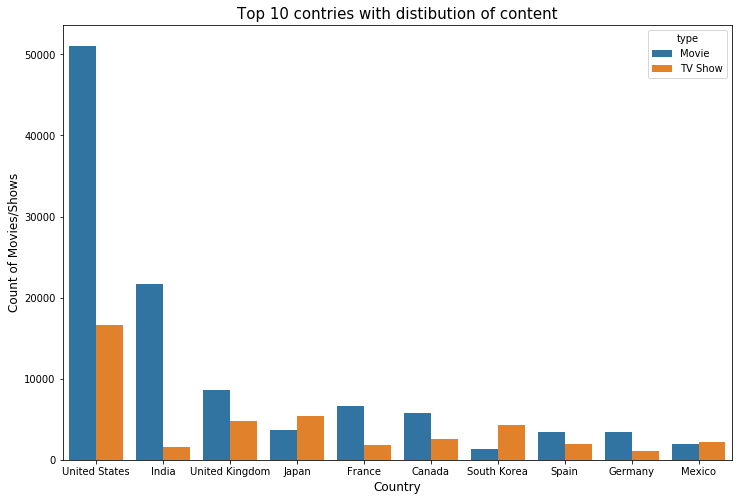

In [39]:
#Removing duplicates created by unnesting
top_10=df[['country','title']].drop_duplicates(keep='first')['country'].value_counts().sort_values(ascending=False).index[:10]
top_10_countries=df.loc[df['country'].isin(top_10)]
#Top 10 Countries producing most content
plt.figure(figsize=(12,8))
sns.countplot(data=top_10_countries,
              x='country',order=top_10_countries['country'].value_counts().sort_values(ascending=False).index,
              hue='type'
           )
#plt.legend()
plt.title('Top 10 contries with distibution of content',fontsize=15)
plt.xlabel('Country',fontsize=12)
plt.ylabel('Count of Movies/Shows',fontsize=12)
plt.show()

**Question 2: How has the number of movies released per year changed over the last 20-30 years?**

Insights- Netflix has see major addition of content from 2015 onwards after they launched global version.  
Business Insights - Content volume has see major boost for all launches - US, Canada, Uk and India. major viewrship are attracted to Netflix OTT.  
Recommendations - Netflix should focus on improving system performance seeing abrupt increase in content addition.  

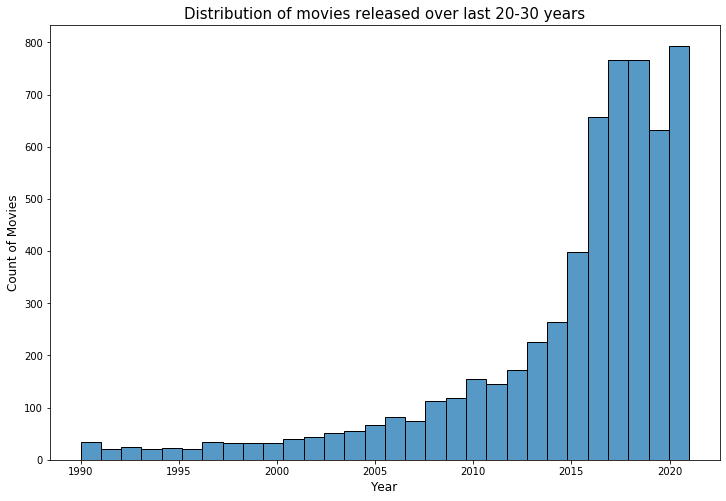

In [40]:
#majority of movies started releasing after 1990 hence we would consider release year greater than 1990
plt.figure(figsize=(12,8))
sns.histplot(df_nest[(df_nest['type']=='Movie') & (df_nest['release_year']>=1990)]['release_year'],bins=30)
#sns.kdeplot(df[(df['type']=='Movie') & (df['release_year']>=1990)]['release_year'],color='red')
plt.title('Distribution of movies released over last 20-30 years',fontsize=15)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Count of Movies',fontsize=12)
plt.show()

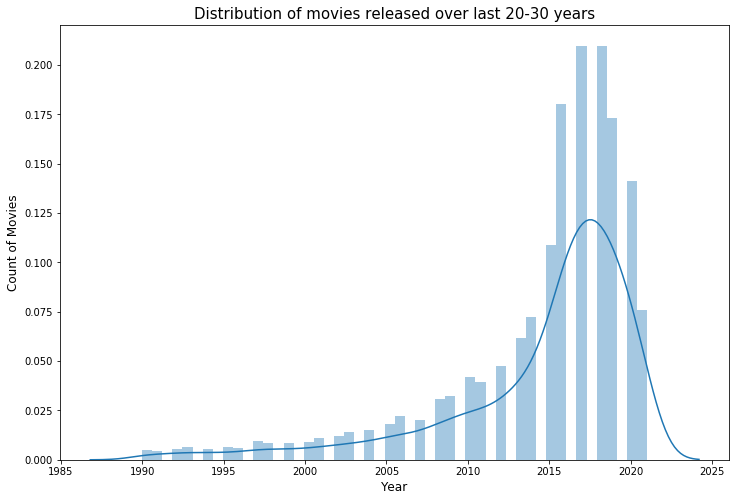

In [41]:
#Distplot for movies distribution after year 1990
plt.figure(figsize=(12,8))
sns.distplot(df_nest[(df_nest['type']=='Movie') & (df_nest['release_year']>=1990)]['release_year'],kde=True)
plt.title('Distribution of movies released over last 20-30 years',fontsize=15)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Count of Movies',fontsize=12)
plt.show()

**Question 3: How content was added to Netflix over the years timeframe**

Insights- Netflix was founded in early 90's with video rent services, but started online in 2008 around and booming started after 2015.
Business Insights - Movie content is very high than TV shows.
Recommendations - Netflix should focus on producing and onboarding new TV show content to cater to large audience demands

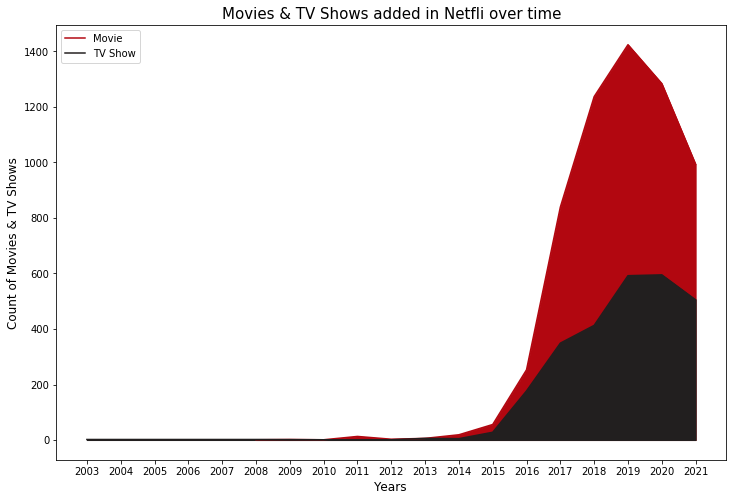

In [42]:
plt.figure(figsize=(12,8))
plt.plot(df_nest[df_nest['type']=='Movie']['date_added_year'].value_counts().sort_index().index,
        df_nest[df_nest['type']=='Movie']['date_added_year'].value_counts().sort_index().values,
        color='#b20710')
plt.plot(df_nest[df_nest['type']=='TV Show']['date_added_year'].value_counts().sort_index().index,
        df_nest[df_nest['type']=='TV Show']['date_added_year'].value_counts().sort_index().values,
        color='#221f1f')
plt.fill_between(df_nest[df_nest['type']=='Movie']['date_added_year'].value_counts().sort_index().index,
        df_nest[df_nest['type']=='Movie']['date_added_year'].value_counts().sort_index().values,
        color='#b20710')
plt.fill_between(df_nest[df_nest['type']=='TV Show']['date_added_year'].value_counts().sort_index().index,
        df_nest[df_nest['type']=='TV Show']['date_added_year'].value_counts().sort_index().values,
        color='#221f1f')
plt.title('Movies & TV Shows added in Netfli over time',fontsize=15)
plt.xlabel('Years',fontsize=12)
plt.legend(['Movie','TV Show'])
plt.xticks(list(np.arange(2003,2022,1)))
plt.ylabel('Count of Movies & TV Shows',fontsize=12)
plt.show()

**Question 4:Content type distribution for all countries?**

Insights- Movies has 70% share vs TV shows 30%  
Business Insights - Movies are very popular in early years of television industry.  
Recommendations - TV shows demad is slowely increasing.  

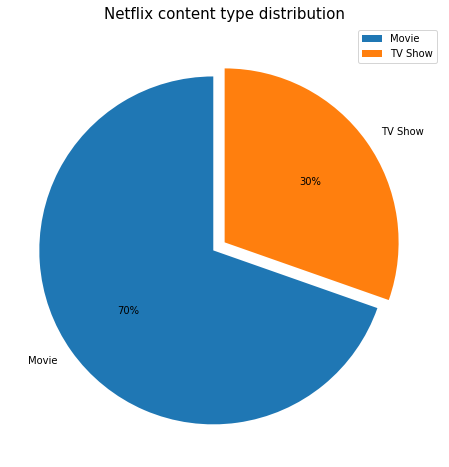

In [43]:
plt.figure(figsize=(12,8))
plt.pie(round(df_nest['type'].value_counts()/len(df_nest)*100,2),labels=list(df_unnest['type'].value_counts().index),
       startangle=90,explode=(0.08,0),autopct='%.0f%%')
plt.legend()
plt.title('Netflix content type distribution',fontsize=15)
plt.show()

**Distribution of movies based on duration**

Insights- Movies has median duration of 98 min.    
Business Insights - Popular category of movies are 100 min.  
Recommendations - New movies should be produced of duration about 100 min.  

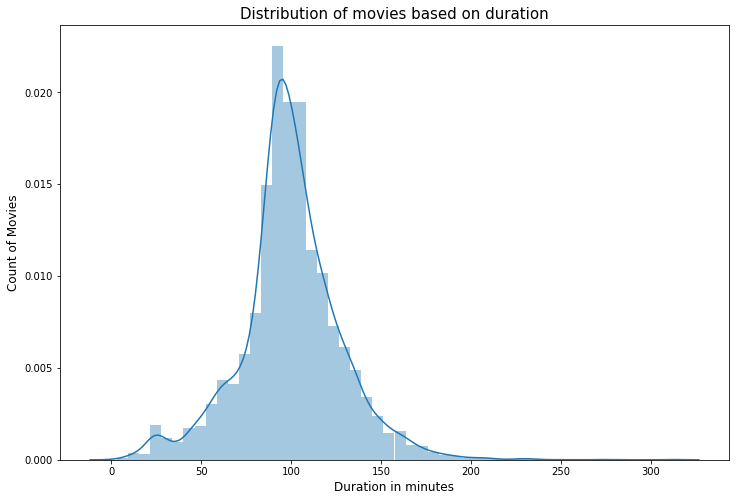

In [44]:
plt.figure(figsize=(12,8))
sns.distplot(df_nest[df_nest['type']=='Movie']['duration'])
plt.title('Distribution of movies based on duration',fontsize=15)
plt.xlabel('Duration in minutes',fontsize=12)
plt.ylabel('Count of Movies',fontsize=12)
plt.show()

**Distirbution of Movie lengths by Box plot**

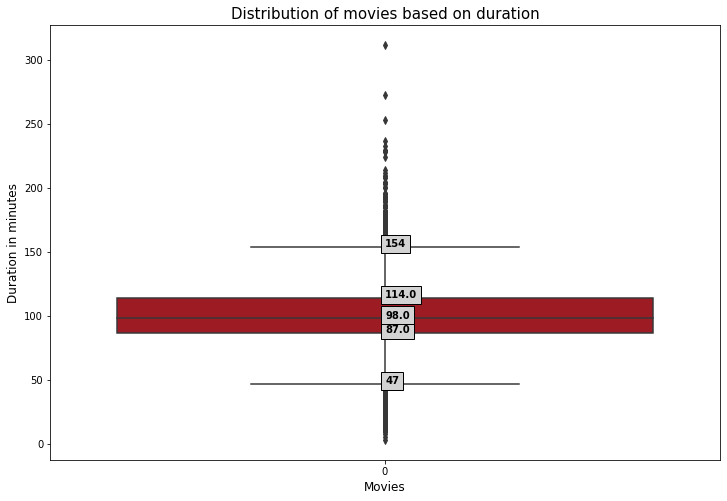

In [45]:
from matplotlib.cbook import boxplot_stats
movie_stats = [boxplot_stats(df_nest[df_nest['type']=='Movie']['duration'].dropna().values)[0]]
stats = pd.DataFrame(movie_stats).iloc[:, [4, 5, 7, 8, 9]].round(2)

plt.figure(figsize=(12,8))
sns.color_palette("viridis", as_cmap=True)
box_plot=sns.boxplot(df_nest[df_nest['type']=='Movie']['duration'],color='#b20710')
plt.title('Distribution of movies based on duration',fontsize=15)
plt.xlabel('Movies',fontsize=12)
plt.ylabel('Duration in minutes',fontsize=12)
for xtick in box_plot.get_xticks():
    for col in stats.columns:
        box_plot.text(xtick, stats[col][xtick], stats[col][xtick], horizontalalignment='left', size='medium', color='k', weight='semibold', bbox=dict(facecolor='lightgray'))
plt.show()

**Distirbution of TV shows lengths**

TV shows has Median length of 2 seasons, so majority of TV shows are not popular enough to go beyond 2 seasons.

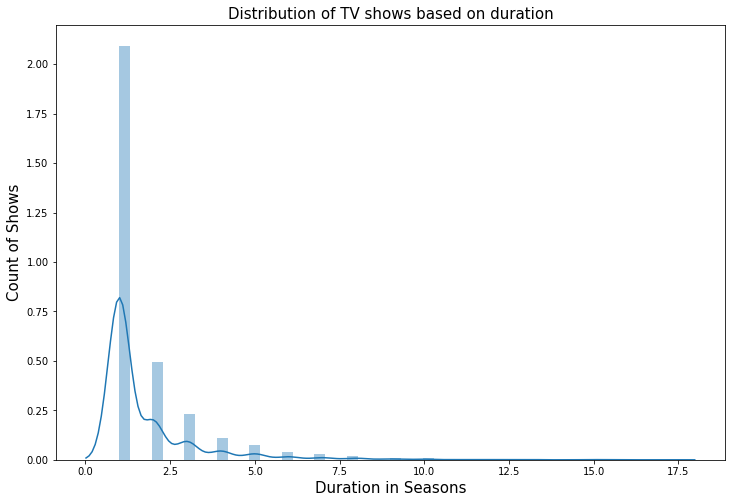

In [46]:
plt.figure(figsize=(12,8))
sns.distplot(df_nest[df_nest['type']=='TV Show']['duration'])
plt.title('Distribution of TV shows based on duration',fontsize=15)
plt.xlabel('Duration in Seasons',fontsize=15)
plt.ylabel('Count of Shows',fontsize=15)
plt.show()

**What is the best time to launch a TV show?**

Insights- July and December month has majority of content being added to Netflix worldwide.  
Business Insights - July and December month has many holidays around that could attract more viewership.  
Recommendations - Produce more content to be released considering holiday periods, and focus on non performing months checking user interests.

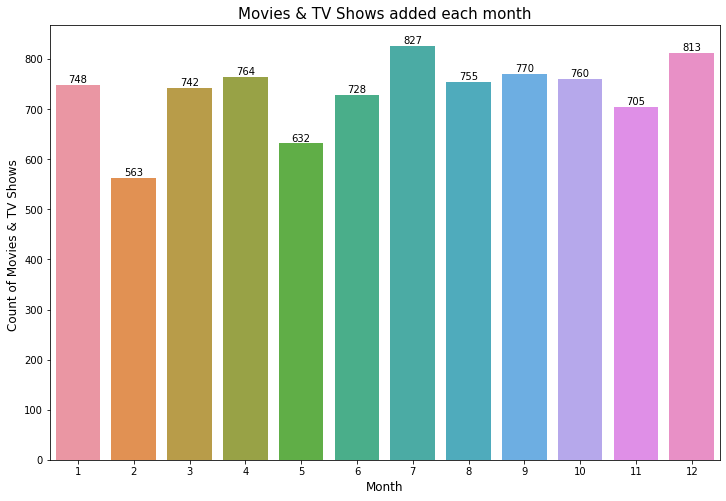

In [47]:
#Which Month of Year has highest frequency of movies/shows being added
df_unique_titles_per_month=df[['date_added_month','title']].drop_duplicates(keep='first')
df_new = pd.DataFrame(df_unique_titles_per_month['date_added_month'].value_counts(),index=df_unique_titles_per_month['date_added_month'].value_counts().index)
plt.figure(figsize=(12,8))
ax=sns.barplot(x=df_new.index,
           y=df_new['date_added_month'])          
plt.title('Movies & TV Shows added each month',fontsize=15)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Count of Movies & TV Shows ',fontsize=12)
for index, value in enumerate(df_new.sort_index()['date_added_month']):
    ax.text(index,value,str(value),ha='center',va='bottom')
    
plt.show()

**TV Shows added over each month of year**

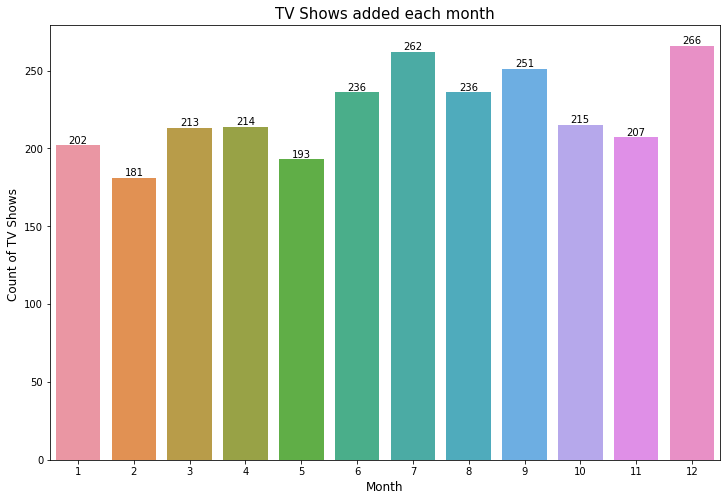

In [48]:
df_unique_TV_shows_per_month=df[df['type']=='TV Show'][['date_added_month','title']].drop_duplicates(keep='first')
df_tv_show=pd.DataFrame(df_unique_TV_shows_per_month['date_added_month'].value_counts().values,columns=['Show_count'],
                        index=df_unique_TV_shows_per_month['date_added_month'].value_counts().index)
plt.figure(figsize=(12,8))
ax=sns.barplot(x=df_tv_show.index,
           y=df_tv_show['Show_count'])          
plt.title('TV Shows added each month',fontsize=15)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Count of TV Shows ',fontsize=12)
for index, value in enumerate(df_tv_show.sort_index()['Show_count']):
    ax.text(index,value,str(value),ha='center',va='bottom')
    
plt.show()

**Movies added over each month of year**

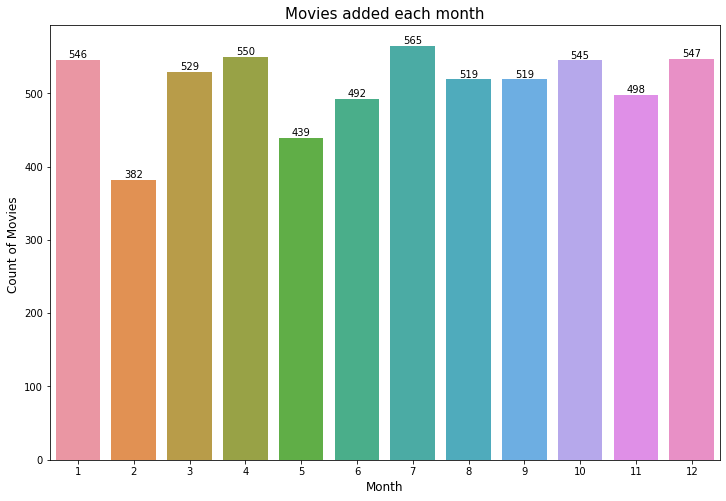

In [49]:
df_unique_TV_shows_per_month=df[df['type']=='Movie'][['date_added_month','title']].drop_duplicates(keep='first')
df_tv_show=pd.DataFrame(df_unique_TV_shows_per_month['date_added_month'].value_counts().values,columns=['Movie_count'],
                       index=df_unique_TV_shows_per_month['date_added_month'].value_counts().index)
plt.figure(figsize=(12,8))
ax=sns.barplot(x=df_tv_show.index,
           y=df_tv_show['Movie_count'])          
plt.title('Movies added each month',fontsize=15)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Count of Movies ',fontsize=12)
for index, value in enumerate(df_tv_show.sort_index()['Movie_count']):
    ax.text(index,value,str(value),ha='center',va='bottom')
    
plt.show()

**Question 5: Analysis of top 10 directors of different types of shows/movies.**

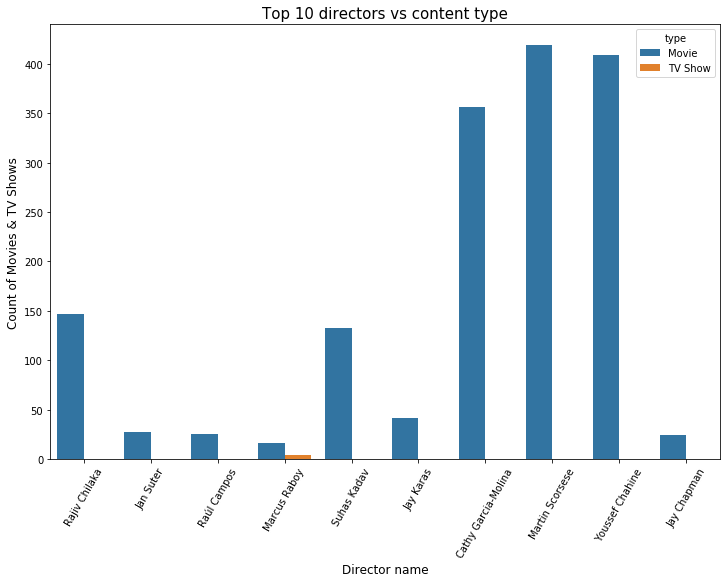

In [50]:
df_unique_director_per_movie_show=df[['director','show_id','type']].drop_duplicates(keep='first')
top_10_directors = df_unique_director_per_movie_show['director'].value_counts()[1:][:10].index
plt.figure(figsize=(12,8))
sns.countplot(x='director',hue='type',
data=df[df['director'].isin(top_10_directors)],order=top_10_directors)
plt.title('Top 10 directors vs content type',fontsize=15)
plt.xlabel('Director name',fontsize=12)
plt.xticks(rotation=60)
plt.ylabel('Count of Movies & TV Shows',fontsize=12)
plt.show()

**Distribution of top 10 Actors with types of content**

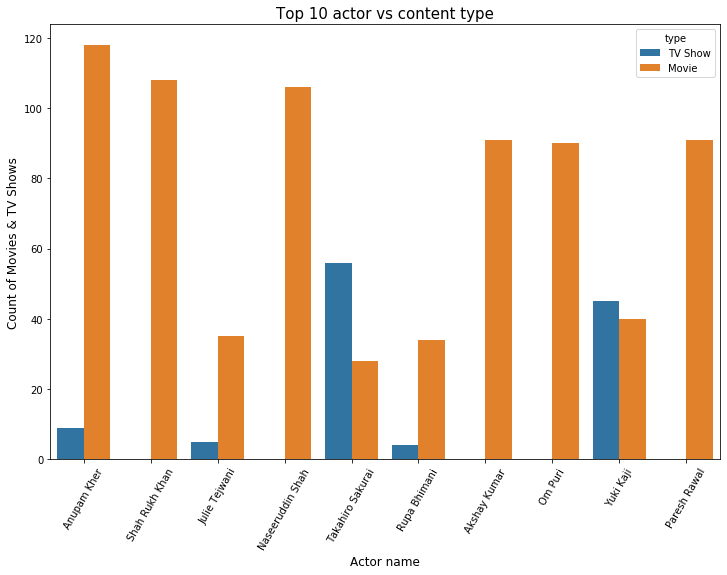

In [51]:
df_unique_actor_per_movie_show=df[['cast','show_id','type']].drop_duplicates(keep='first')
top_10_actors = df_unique_actor_per_movie_show['cast'].value_counts()[1:][:10].index
plt.figure(figsize=(12,8))
sns.countplot(x='cast',hue='type',
data=df[df['cast'].isin(top_10_actors)],order=top_10_actors)
plt.title('Top 10 actor vs content type',fontsize=15)
plt.xlabel('Actor name',fontsize=12)
plt.xticks(rotation=60)
plt.ylabel('Count of Movies & TV Shows',fontsize=12)
plt.show()

**Question 6:Does Netflix has more focus on TV Shows than movies in recent years**

Insights- Yes, TV shows volume is picking up since 2017 while Movies volume is stable of declining.  
Business Insights -  TV shows popularity has been increased from 2015, Netflix should produce or onboard more TV shows in coming years.   
Recommendations - Produce more TV shows  as per user test and interested categories.  

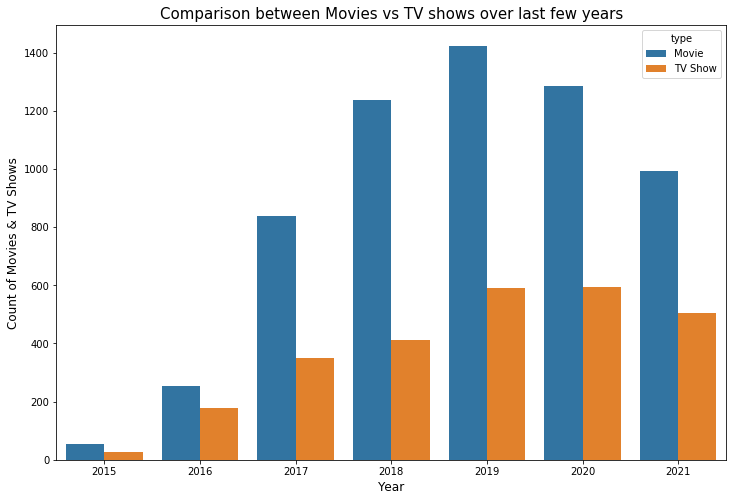

In [52]:
df_recent_movies=df[(df['date_added_year']>=2015)][['type','title','date_added_year']].drop_duplicates(keep='first')[['date_added_year','type']]
plt.figure(figsize=(12,8))
sns.countplot(x='date_added_year',data=df_recent_movies,hue='type')
plt.title('Comparison between Movies vs TV shows over last few years',fontsize=15)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Count of Movies & TV Shows',fontsize=12)
plt.show()

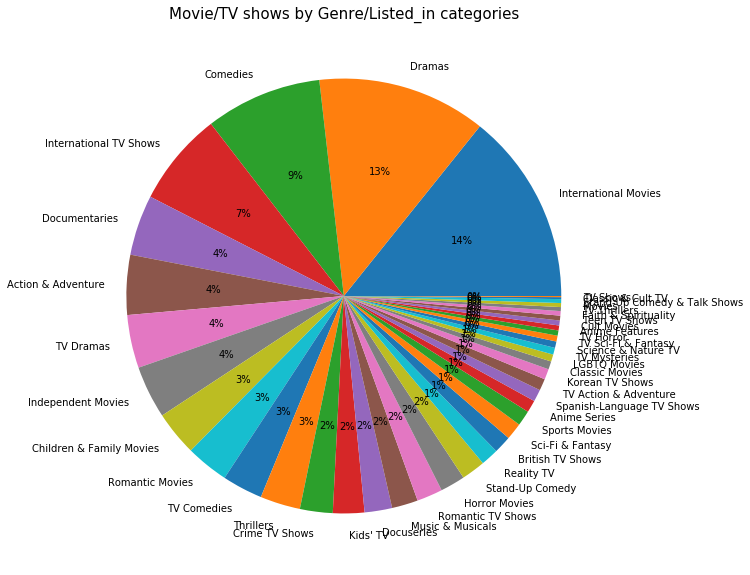

In [53]:
# Pie plot for Genre/Listed_in
#International movies and Drama are favourite categories for viewers.
df_unique_genres=df[['listed_in','show_id']].drop_duplicates(keep='first')
unique_genres = df_unique_genres['listed_in'].value_counts()
plt.figure(figsize=(16,10))
plt.pie(unique_genres,labels=unique_genres.index,startangle=0,autopct='%.0f%%')          
plt.title('Movie/TV shows by Genre/Listed_in categories',fontsize=15)

plt.show()

**Cumulative total of Movies/Shows added by month**

Recommendations - both TV shows and Movies has picked up volume in July and Dec months. try focusing on adding more content during those months.

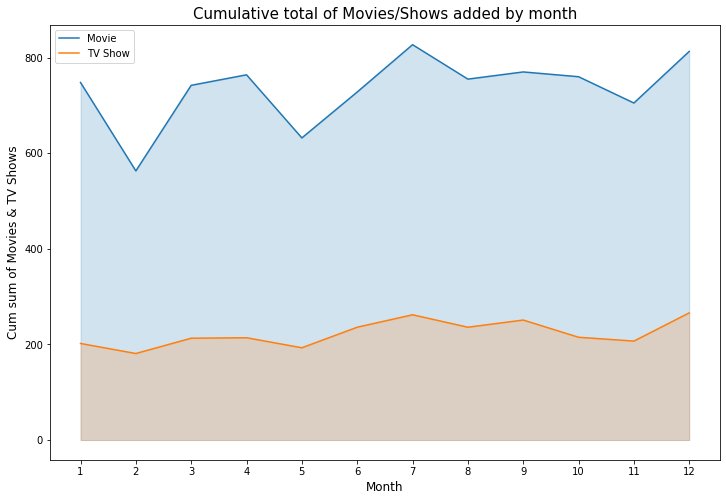

In [54]:
plt.figure(figsize=(12,8))
ax=sns.lineplot(x=df_nest.groupby('type')['date_added_month'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T.index,
            y=df_nest.groupby('type')['date_added_month'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T['Movie'])
sns.lineplot(x=df_nest.groupby('type')['date_added_month'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T.index,
            y=df_nest.groupby('type')['date_added_month'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T['TV Show'])
for line in ax.lines:
    x, y = line.get_xydata().T
    ax.fill_between(x, 0, y, color=line.get_color(), alpha=0.2)
    
plt.title('Cumulative total of Movies/Shows added by month',fontsize=15)
plt.xlabel('Month',fontsize=12)
plt.legend(['Movie','TV Show'])
plt.xticks(df_nest.groupby('type')['date_added_month'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T.index)
plt.ylabel('Cum sum of Movies & TV Shows',fontsize=12)
plt.show()

**Pairplot to find co-relation between different columns of dataframe**

<Figure size 864x576 with 0 Axes>

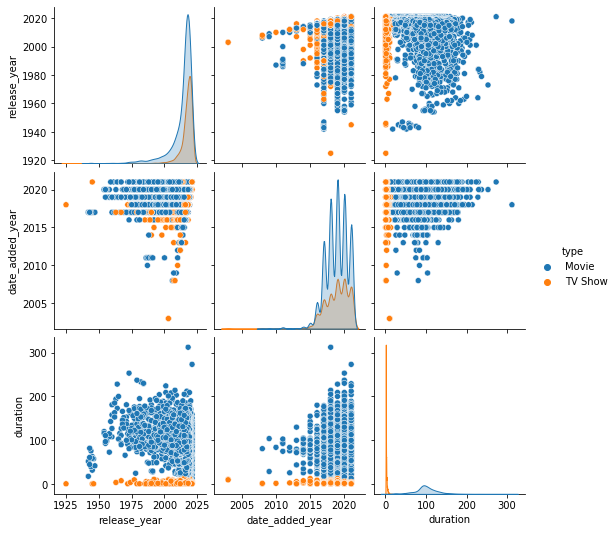

In [55]:
plt.figure(figsize=(12,8))

sns.pairplot(data=df_nest[['release_year','date_added_year','duration','type']], hue='type')

**Average time took for Movies/TV shows to be added to Netflix after release ~ 7 months**

In [56]:
(df_nest['date_added_year']-df_nest[df_nest['release_year']>2015]['release_year']).mean() 

0.731966053748232

In [57]:
df.to_csv('formatted_netflix.csv') #save DF to csv file for later use